In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, plot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline
import math as m

pd.set_option('display.max_columns', None)
plt.style.use('bmh')

In [2]:
zipcodes = pd.read_csv('DataSets/SF_Population/ziplatlong.csv', sep=';')

In [3]:
police_incidents_new = pd.read_csv('DataSets/Stadium Impact/Police_Department_Incident_Reports__2018_to_Present.csv')
police_incidents_new.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')

In [4]:
police_incidents_new['Incident Date'] = pd.to_datetime(police_incidents_new['Incident Date'])

In [5]:
police_incidents_new['Month'] = police_incidents_new['Incident Date'].transform(lambda x: x.month)

In [6]:
police_incidents_new.groupby(['Incident Year','Month']).count()['Incident Date']

Incident Year  Month
2018           1        13321
               2        11817
               3        12508
               4        12502
               5        12951
               6        12403
               7        13802
               8        13899
               9        12782
               10       13273
               11       12034
               12       12373
2019           1        12122
               2        10976
               3        11801
               4        11795
               5        12281
               6        12099
               7        13098
               8        13716
               9        12850
               10       13615
               11       12144
               12       12218
2020           1        11963
               2        11101
               3         8656
               4         1162
Name: Incident Date, dtype: int64

In [7]:
police_incidents_new.isnull().sum()

Incident Datetime                                            0
Incident Date                                                0
Incident Time                                                0
Incident Year                                                0
Incident Day of Week                                         0
Report Datetime                                              0
Row ID                                                       0
Incident ID                                                  0
Incident Number                                              0
CAD Number                                               77784
Report Type Code                                             0
Report Type Description                                      0
Filed Online                                            262841
Incident Code                                                0
Incident Category                                           92
Incident Subcategory                                   

In [8]:
from geopy.distance import geodesic
test=[37.7196874952717, -122.476327815126]

def closest_pt(row):
    distances=[]
    zips=zipcodes[['Latitude','Longitude']]
    for elem in range(len(zipcodes.index)):
        try:
            dist = geodesic((row[0],row[1]), (zips.iloc[elem,0],zips.iloc[elem,1]))
            distances.append(dist)
        except ValueError:   
            continue
    return zipcodes.iloc[np.argmin(distances),0]

closest_pt(test)

94132

In [9]:
police_incidents_new[police_incidents_new['Analysis Neighborhood'].isna()].isna().sum()

Incident Datetime                                           0
Incident Date                                               0
Incident Time                                               0
Incident Year                                               0
Incident Day of Week                                        0
Report Datetime                                             0
Row ID                                                      0
Incident ID                                                 0
Incident Number                                             0
CAD Number                                              16676
Report Type Code                                            0
Report Type Description                                     0
Filed Online                                             4149
Incident Code                                               0
Incident Category                                           0
Incident Subcategory                                        0
Incident

In [10]:
police_incidents_new = police_incidents_new.fillna(0)
police_incidents_new.groupby(['Incident Year','Month']).count()['Incident Date']

Incident Year  Month
2018           1        13321
               2        11817
               3        12508
               4        12502
               5        12951
               6        12403
               7        13802
               8        13899
               9        12782
               10       13273
               11       12034
               12       12373
2019           1        12122
               2        10976
               3        11801
               4        11795
               5        12281
               6        12099
               7        13098
               8        13716
               9        12850
               10       13615
               11       12144
               12       12218
2020           1        11963
               2        11101
               3         8656
               4         1162
Name: Incident Date, dtype: int64

In [11]:
zips = police_incidents_new.groupby(['Latitude','Longitude'])['Incident Date'].count().reset_index()
zips['Lat_Long'] = zips[['Latitude', 'Longitude']].values.tolist()
zips.head()

,Latitude,Longitude,Incident Date,Lat_Long
0,0.000000,0.000000,17910,"[0.0, 0.0]"
1,37.707988,-122.462313,4,"[37.70798825918467, -122.46231335746752]"
2,37.708020,-122.412497,38,"[37.70802018416812, -122.41249676853344]"
3,37.708058,-122.441986,22,"[37.70805761187209, -122.44198634816915]"
4,37.708215,-122.452347,2,"[37.70821480335819, -122.45234680782866]"


In [12]:
zips['Zipcode'] = zips['Lat_Long'].apply(closest_pt)
zips

,Latitude,Longitude,Incident Date,Lat_Long,Zipcode
0,0.000000,0.000000,17910,"[0.0, 0.0]",94130
1,37.707988,-122.462313,4,"[37.70798825918467, -122.46231335746752]",94112
2,37.708020,-122.412497,38,"[37.70802018416812, -122.41249676853344]",94134
3,37.708058,-122.441986,22,"[37.70805761187209, -122.44198634816915]",94112
4,37.708215,-122.452347,2,"[37.70821480335819, -122.45234680782866]",94112
...,...,...,...,...,...
6387,37.829549,-122.371429,57,"[37.82954857858764, -122.37142899749846]",94130
6388,37.829617,-122.373178,14,"[37.82961662060153, -122.37317787318324]",94130
6389,37.829662,-122.375600,15,"[37.82966229571011, -122.3755995788448]",94130
6390,37.829792,-122.375324,16,"[37.829791577119025, -122.3753235669606]",94130


In [13]:
zips['str1']=zips['Latitude'].transform(lambda x: str(x))
zips['str2']=zips['Longitude'].transform(lambda x: str(x))
zips['indx']=zips['str1']+zips['str2']
# zips.to_csv('2018presentzips')
# zips = pd.read_csv('2018presentzips')
police_incidents_new['str1']=police_incidents_new['Latitude'].transform(lambda x: str(x))
police_incidents_new['str2']=police_incidents_new['Longitude'].transform(lambda x: str(x))
police_incidents_new['indx']=police_incidents_new['str1']+police_incidents_new['str2']

In [14]:
polpresent = pd.merge(police_incidents_new, zips, on='indx')
polpresent = polpresent.drop(columns=['str1_x','str2_x','indx','Latitude_y',
                                     'Longitude_y','Incident Date_y',
                                     'str1_y','str2_y'])

In [15]:
polpresent['Incident Date_x']=pd.to_datetime(polpresent['Incident Date_x'])
polpresent = polpresent.rename(columns={'Incident Date_x': 'Incident Date'})
polpresent.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude_x,Longitude_x,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month,Lat_Long,Zipcode
0,2019/05/01 01:00:00 AM,2019-05-01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,II,Initial,0,15200,Offences Against The Family And Children,Other,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,5,"[37.76256939715695, -122.49962745519908]",94122
1,2020/02/28 10:00:00 PM,2020-02-28,22:00,2020,Friday,2020/03/02 11:39:00 AM,90966328150,909663,206048955,0.0,II,Coplogic Initial,True,28150,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,2,"[37.76256939715695, -122.49962745519908]",94122
2,2019/10/25 11:45:00 PM,2019-10-25,23:45,2019,Friday,2019/10/26 09:48:00 AM,86288607021,862886,190808762,192991312.0,VI,Vehicle Initial,0,7021,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122
3,2019/10/03 06:59:00 PM,2019-10-03,18:59,2019,Thursday,2019/10/03 06:59:00 PM,85413763010,854137,190267544,192763614.0,IS,Initial Supplement,0,63010,Warrant,Other,"Warrant Arrest, Local SF Warrant",Cite or Arrest Adult,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122
4,2019/10/29 01:56:00 PM,2019-10-29,13:56,2019,Tuesday,2019/10/29 03:05:00 PM,86407607041,864076,190808762,193022311.0,VS,Vehicle Supplement,0,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,40TH AVE \ IRVING ST,27789000.0,Ingleside,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122


In [16]:
polpresent.groupby(['Incident Year','Month']).count()['Incident Date']

Incident Year  Month
2018           1        13321
               2        11817
               3        12508
               4        12502
               5        12951
               6        12403
               7        13802
               8        13899
               9        12782
               10       13273
               11       12034
               12       12373
2019           1        12122
               2        10976
               3        11801
               4        11795
               5        12281
               6        12099
               7        13098
               8        13716
               9        12850
               10       13615
               11       12144
               12       12218
2020           1        11963
               2        11101
               3         8656
               4         1162
Name: Incident Date, dtype: int64

In [17]:
sf_pop = {'2020': 884363, '2019': 881549, '2018': 883305, '2017': 884363, '2016': 883305, '2015': 864816, 
          '2014': 852469,'2013': 837442, '2012': 825865, '2011': 812826, '2010': 805463, 
          '2009': 774347,'2008': 767067, '2007': 758348, '2006': 751431, '2005': 748846, 
          '2004': 750133,'2003': 757638, '2002': 755862, '2001': 777613, '2000': 777340}
year=[]
pop=[]
for key, val in sf_pop.items():
    year.append(int(key))
    pop.append(int(val))
d={'year': year, 'pop': pop}
sf_pop_df = pd.DataFrame(d).sort_values('year')
sf_pop_df

,year,pop
20,2000,777340
19,2001,777613
18,2002,755862
17,2003,757638
16,2004,750133
15,2005,748846
14,2006,751431
13,2007,758348
12,2008,767067
11,2009,774347


In [18]:
#normalizing the data:
polpresent['Norm'] = 1

for idx in range(0,len(sf_pop_df)):
    polpresent.loc[polpresent['Incident Year']==sf_pop_df.iloc[idx,0],'Norm'] = 1/(sf_pop_df.iloc[idx,1])

In [19]:
polpresent['Incident Date'].min(), polpresent['Incident Date'].max()
polpresent.groupby(['Incident Year','Month']).count()['Incident Date']

Incident Year  Month
2018           1        13321
               2        11817
               3        12508
               4        12502
               5        12951
               6        12403
               7        13802
               8        13899
               9        12782
               10       13273
               11       12034
               12       12373
2019           1        12122
               2        10976
               3        11801
               4        11795
               5        12281
               6        12099
               7        13098
               8        13716
               9        12850
               10       13615
               11       12144
               12       12218
2020           1        11963
               2        11101
               3         8656
               4         1162
Name: Incident Date, dtype: int64

In [20]:
polpresent['Analysis Neighborhood'].unique()

array(['Sunset/Parkside', 'South of Market', 'Bayview Hunters Point',
       'Chinatown', 'Marina', 'Financial District/South Beach',
       'Lone Mountain/USF', 'Western Addition', 'Russian Hill',
       'Castro/Upper Market', 'Hayes Valley', 'Japantown', 'Tenderloin',
       'Nob Hill', 'Haight Ashbury', 0, 'Lincoln Park', 'Presidio',
       'Mission', 'Mission Bay', 'Outer Richmond', 'Noe Valley',
       'Inner Sunset', 'Pacific Heights', 'West of Twin Peaks',
       'Golden Gate Park', 'North Beach', 'Potrero Hill', 'Excelsior',
       'Inner Richmond', 'Visitacion Valley', 'Presidio Heights',
       'Oceanview/Merced/Ingleside', 'Twin Peaks', 'Portola',
       'Outer Mission', 'Lakeshore', 'McLaren Park', 'Bernal Heights',
       'Glen Park', 'Treasure Island', 'Seacliff'], dtype=object)

In [21]:
cats_of_interest = ['Non-Criminal','Stolen Property','Miscellaneous Investigation',
                    'Other Miscellaneous','Assault', 'Larceny Theft', 'Malicious Mischief', 
                    'Disorderly Conduct','Traffic Collision', 'Liquor Laws', 
                    'Fire Report', 'Suspicious', 'Drug Offense',
                    'Suspicious Occ','Traffic Violation Arrest', 'Other Offenses', 'Other',
                   'Drug Violation', 'Civil Sidewalks', 'Fire Report']
zipcodes_of_interest = ['94107','94103', '94158', '94105']
neighbors_of_interest = ['Mission', 'Financial District/South Beach','South of Market','Mission Bay',
                          'Potrero Hill']


In [22]:
polpresent['Incident Category'].unique()

array(['Offences Against The Family And Children', 'Malicious Mischief',
       'Motor Vehicle Theft', 'Warrant', 'Recovered Vehicle',
       'Other Miscellaneous', 'Larceny Theft', 'Non-Criminal',
       'Miscellaneous Investigation', 'Missing Person', 'Other Offenses',
       'Assault', 'Burglary', 'Fire Report', 'Drug Offense', 'Other',
       'Weapons Offense', 'Sex Offense', 'Disorderly Conduct', 0,
       'Traffic Violation Arrest', 'Robbery', 'Suspicious Occ',
       'Weapons Carrying Etc', 'Lost Property', 'Fraud', 'Rape',
       'Forgery And Counterfeiting', 'Stolen Property', 'Case Closure',
       'Vandalism', 'Arson', 'Family Offense', 'Courtesy Report',
       'Traffic Collision', 'Embezzlement', 'Drug Violation',
       'Civil Sidewalks', 'Liquor Laws', 'Homicide', 'Vehicle Misplaced',
       'Vehicle Impounded', 'Motor Vehicle Theft?', 'Suicide',
       'Human Trafficking (A), Commercial Sex Acts', 'Suspicious',
       'Human Trafficking, Commercial Sex Acts', 'Prostitut

In [23]:
import calendar
polpresent['Month'] = polpresent['Incident Date'].transform(lambda x: x.month)
polpresent['Month-Year'] = polpresent['Incident Date'].transform(lambda x: f'{calendar.month_abbr[x.month]} {x.year}')
polpresent['Year'] = polpresent['Incident Date'].transform(lambda x: x.year)
polpresent.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude_x,Longitude_x,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month,Lat_Long,Zipcode,Norm,Month-Year,Year
0,2019/05/01 01:00:00 AM,2019-05-01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,II,Initial,0,15200,Offences Against The Family And Children,Other,Domestic Violence (secondary only),Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,5,"[37.76256939715695, -122.49962745519908]",94122,0.000001,May 2019,2019
1,2020/02/28 10:00:00 PM,2020-02-28,22:00,2020,Friday,2020/03/02 11:39:00 AM,90966328150,909663,206048955,0.0,II,Coplogic Initial,True,28150,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,2,"[37.76256939715695, -122.49962745519908]",94122,0.000001,Feb 2020,2020
2,2019/10/25 11:45:00 PM,2019-10-25,23:45,2019,Friday,2019/10/26 09:48:00 AM,86288607021,862886,190808762,192991312.0,VI,Vehicle Initial,0,7021,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Auto",Open or Active,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122,0.000001,Oct 2019,2019
3,2019/10/03 06:59:00 PM,2019-10-03,18:59,2019,Thursday,2019/10/03 06:59:00 PM,85413763010,854137,190267544,192763614.0,IS,Initial Supplement,0,63010,Warrant,Other,"Warrant Arrest, Local SF Warrant",Cite or Arrest Adult,40TH AVE \ IRVING ST,27789000.0,Taraval,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122,0.000001,Oct 2019,2019
4,2019/10/29 01:56:00 PM,2019-10-29,13:56,2019,Tuesday,2019/10/29 03:05:00 PM,86407607041,864076,190808762,193022311.0,VS,Vehicle Supplement,0,7041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,40TH AVE \ IRVING ST,27789000.0,Ingleside,Sunset/Parkside,4.0,37.762569,-122.499627,"(37.76256939715695, -122.49962745519909)",39.0,10.0,7.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,10,"[37.76256939715695, -122.49962745519908]",94122,0.000001,Oct 2019,2019


In [24]:
# # polpresent.to_csv('norm_police_present.csv')
# polpresent = pd.read_csv('norm_police_present.csv')

In [25]:
polpresent['Norm'] = 1
#normalizing the data:

for idx in range(0,len(sf_pop_df)):
    polpresent.loc[polpresent['Incident Year']==sf_pop_df.iloc[idx,0],'Norm'] = 1/(sf_pop_df.iloc[idx,1])

In [26]:
# polpresent.to_csv('norm_police_present.csv')
# polpresent = pd.read_csv('norm_police_present.csv')
# polpresent.head()

In [27]:
polpresentclean = polpresent[['Incident Category','Incident Description','Incident Date','Month','Month-Year',
                              'Year','Incident Time','Zipcode','Police District','Longitude_x','Latitude_x',
                              'Analysis Neighborhoods', 'Incident Day of Week', 'Norm']][(polpresent['Zipcode'].isin(zipcodes_of_interest)) &
                                       (polpresent['Incident Category'].isin(cats_of_interest)) ]

In [28]:
polpresentneighbor = polpresent[['Incident Category','Incident Description','Incident Date','Month','Month-Year',
                              'Year','Incident Time','Zipcode','Police District','Longitude_x','Latitude_x',
                              'Analysis Neighborhoods', 'Incident Day of Week', 'Norm']][(polpresent['Analysis Neighborhood'].isin(neighbors_of_interest)) &
                                       (polpresent['Incident Category'].isin(cats_of_interest)) ]

In [29]:
polpresentclean['Incident Date']=pd.to_datetime(polpresentclean['Incident Date'])

In [30]:
polpresentneighbor.groupby('Month').count()['Incident Date']

Month
1     7893
2     7332
3     7072
4     5539
5     5489
6     5321
7     5893
8     5870
9     5537
10    5506
11    5297
12    4896
Name: Incident Date, dtype: int64

In [31]:
polpresentclean.groupby(['Year','Month']).count()['Incident Date']
#Going with the same zipcodes as the Fire Department Group for consistency

Year  Month
2018  1        1609
      2        1454
      3        1540
      4        1554
      5        1415
      6        1438
      7        1587
      8        1493
      9        1596
      10       1494
      11       1388
      12       1278
2019  1        1285
      2        1188
      3        1299
      4        1294
      5        1370
      6        1302
      7        1428
      8        1510
      9        1329
      10       1396
      11       1388
      12       1261
2020  1        1217
      2        1154
      3         985
      4         102
Name: Incident Date, dtype: int64

In [32]:
polpresentclean.head()

,Incident Category,Incident Description,Incident Date,Month,Month-Year,Year,Incident Time,Zipcode,Police District,Longitude_x,Latitude_x,Analysis Neighborhoods,Incident Day of Week,Norm
20,Non-Criminal,Mental Health Detention,2019-06-22,6,Jun 2019,2019,07:45,94103,Southern,-122.408161,37.780535,34.0,Saturday,0.000001
23,Assault,"Battery, former Spouse or Dating Relationship",2020-02-03,2,Feb 2020,2020,19:08,94103,Southern,-122.408161,37.780535,34.0,Monday,0.000001
25,Malicious Mischief,"Malicious Mischief, Vandalism to Property",2019-03-06,3,Mar 2019,2019,11:01,94103,Southern,-122.408161,37.780535,34.0,Wednesday,0.000001
26,Assault,"Assault, Aggravated, W/ Other Weapon",2020-02-05,2,Feb 2020,2020,04:24,94103,Southern,-122.408161,37.780535,34.0,Wednesday,0.000001
27,Other Miscellaneous,Probation Violation,2020-02-05,2,Feb 2020,2020,04:24,94103,Southern,-122.408161,37.780535,34.0,Wednesday,0.000001


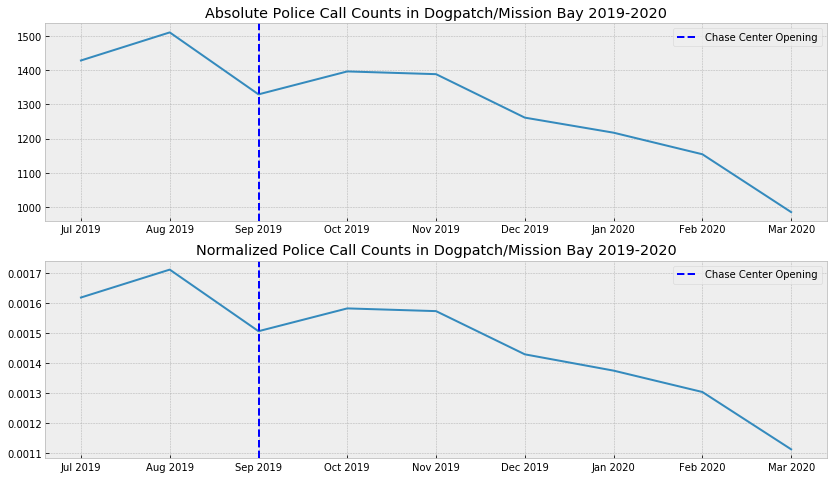

In [33]:
date_range = pd.date_range(start='2019-07-01', end='2020-03-31')
poljul19 = polpresentclean[polpresentclean['Incident Date'].isin(date_range)].sort_values(['Incident Date'])
calls = poljul19['Incident Category'].unique()
labels = poljul19.groupby(['Year','Month']).count()['Incident Date']

fig, ax = plt.subplots(2,1,figsize=(14,8))
ax[0].plot(poljul19['Month-Year'].unique(),poljul19.groupby(['Year','Month']).count()['Incident Date'])
ax[0].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[0].set_title(f'Absolute Police Call Counts in Dogpatch/Mission Bay 2019-2020')
ax[0].set_xticks(poljul19['Month-Year'].unique())
ax[0].legend(loc='best')
ax[1].plot(poljul19['Month-Year'].unique(),poljul19.groupby(['Year','Month']).sum()['Norm'])
ax[1].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[1].set_title(f'Normalized Police Call Counts in Dogpatch/Mission Bay 2019-2020')
ax[1].set_xticks(poljul19['Month-Year'].unique())
ax[1].legend(loc='best')
plt.savefig('Graphs/policeincidentmbdp2019-2020.png',dpi=300)

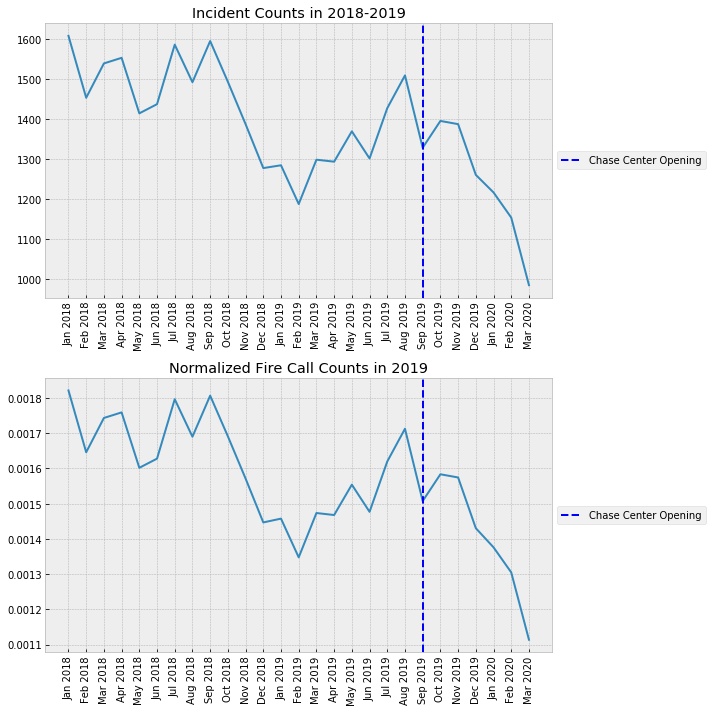

In [34]:
date_range = pd.date_range(start='2018-01-01', end='2020-03-31')
poljul19 = polpresentclean[polpresentclean['Incident Date'].isin(date_range)].sort_values(['Incident Date'])
calls = poljul19['Incident Category'].unique()
labels = poljul19.groupby(['Year','Month']).count()['Incident Date']

fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(poljul19['Month-Year'].unique(),poljul19.groupby(['Year','Month']).count()['Incident Date'])
ax[0].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[0].set_title(f'Incident Counts in 2018-2019')
ax[0].set_xticks(poljul19['Month-Year'].unique()[::])
ax[0].set_xticklabels(poljul19['Month-Year'].unique()[::], rotation='vertical')
ax[0].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
ax[1].plot(poljul19['Month-Year'].unique(),poljul19.groupby(['Year','Month']).sum()['Norm'])
ax[1].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[1].set_title(f'Normalized Fire Call Counts in 2019')
ax[1].set_xticks(poljul19['Month-Year'].unique()[::])
ax[1].set_xticklabels(poljul19['Month-Year'].unique()[::], rotation='vertical')
ax[1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.savefig('Graphs/Incidents2018-2020.png', dpi=300)

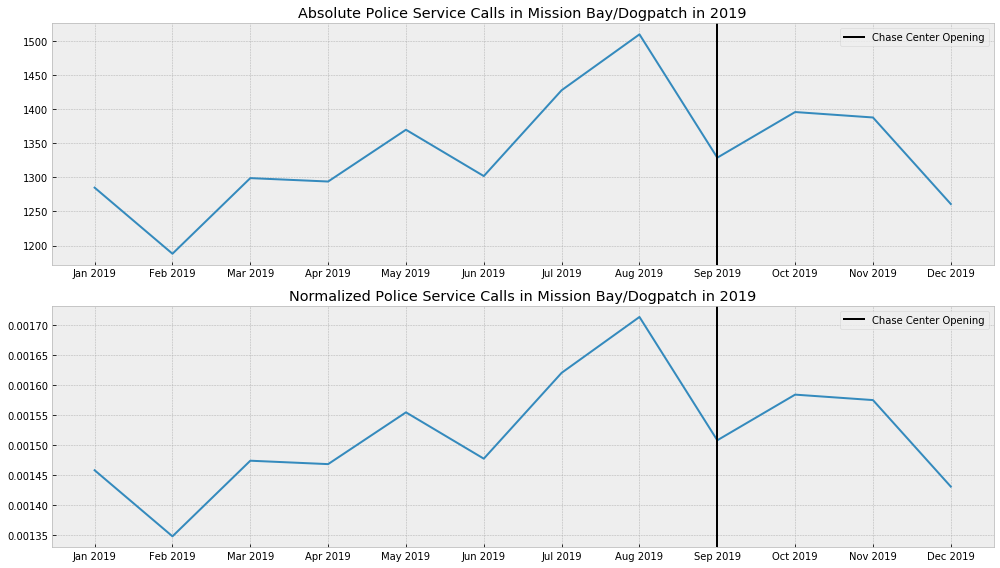

In [35]:
#Police Service Calls in 2019
pol2019 = polpresentclean[polpresentclean['Year']==2019].sort_values('Incident Date')
monthly = pol2019.groupby('Month')
months = pol2019['Month-Year'].unique()

fig, ax = plt.subplots(2,1,figsize=(14,8))
ax[0].plot(months, monthly.count()['Norm'])
ax[0].axvline('Sep 2019', color='black', label='Chase Center Opening')
ax[0].set_xticks(months)
ax[0].set_title('Absolute Police Service Calls in Mission Bay/Dogpatch in 2019')
ax[0].legend(loc='upper right')
ax[1].plot(months, monthly.sum()['Norm'])
ax[1].axvline('Sep 2019', color='black', label='Chase Center Opening')
ax[1].set_xticks(months)
ax[1].set_title('Normalized Police Service Calls in Mission Bay/Dogpatch in 2019')
ax[1].legend(loc='upper right')
# plt.savefig('Graphs/2019_Crime_DPMS.png')
plt.tight_layout()
plt.show()

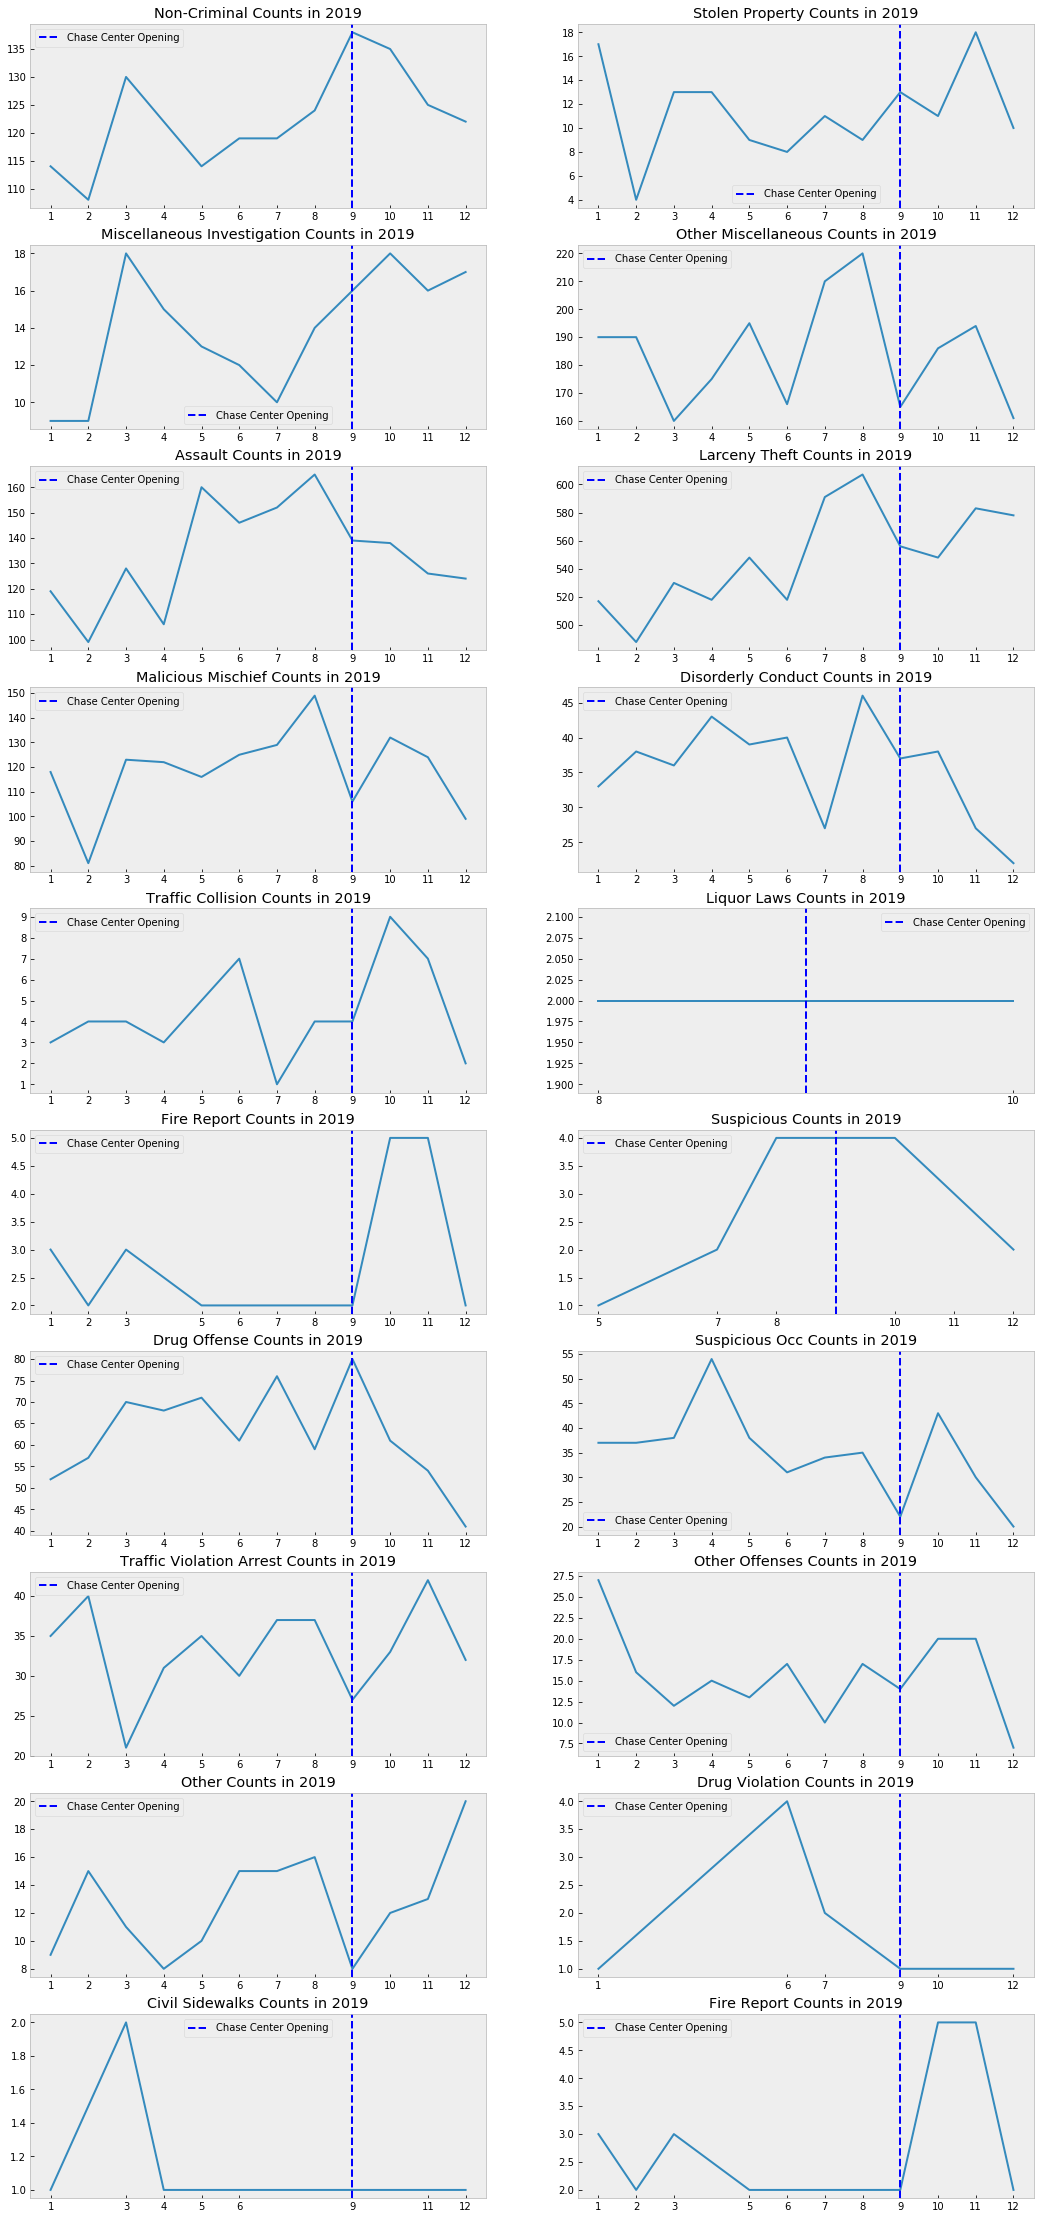

In [36]:
#Absolute Values
fig, axes = plt.subplots(10,2, figsize=(18,40))
for ix, ax in enumerate(axes.flatten()):
    graph = pol2019[pol2019['Incident Category']==cats_of_interest[ix]].sort_values('Incident Date')
    ax.plot(graph['Month'].unique(),graph.groupby('Month').count()['Norm'])
    ax.axvline(9, ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'{cats_of_interest[ix]} Counts in 2019')
    ax.set_xticks(graph['Month'].unique())
    ax.legend(loc='best')
    ax.grid(None)
#     plt.savefig('Graphs/Absolute_Crime_DPMS.png')


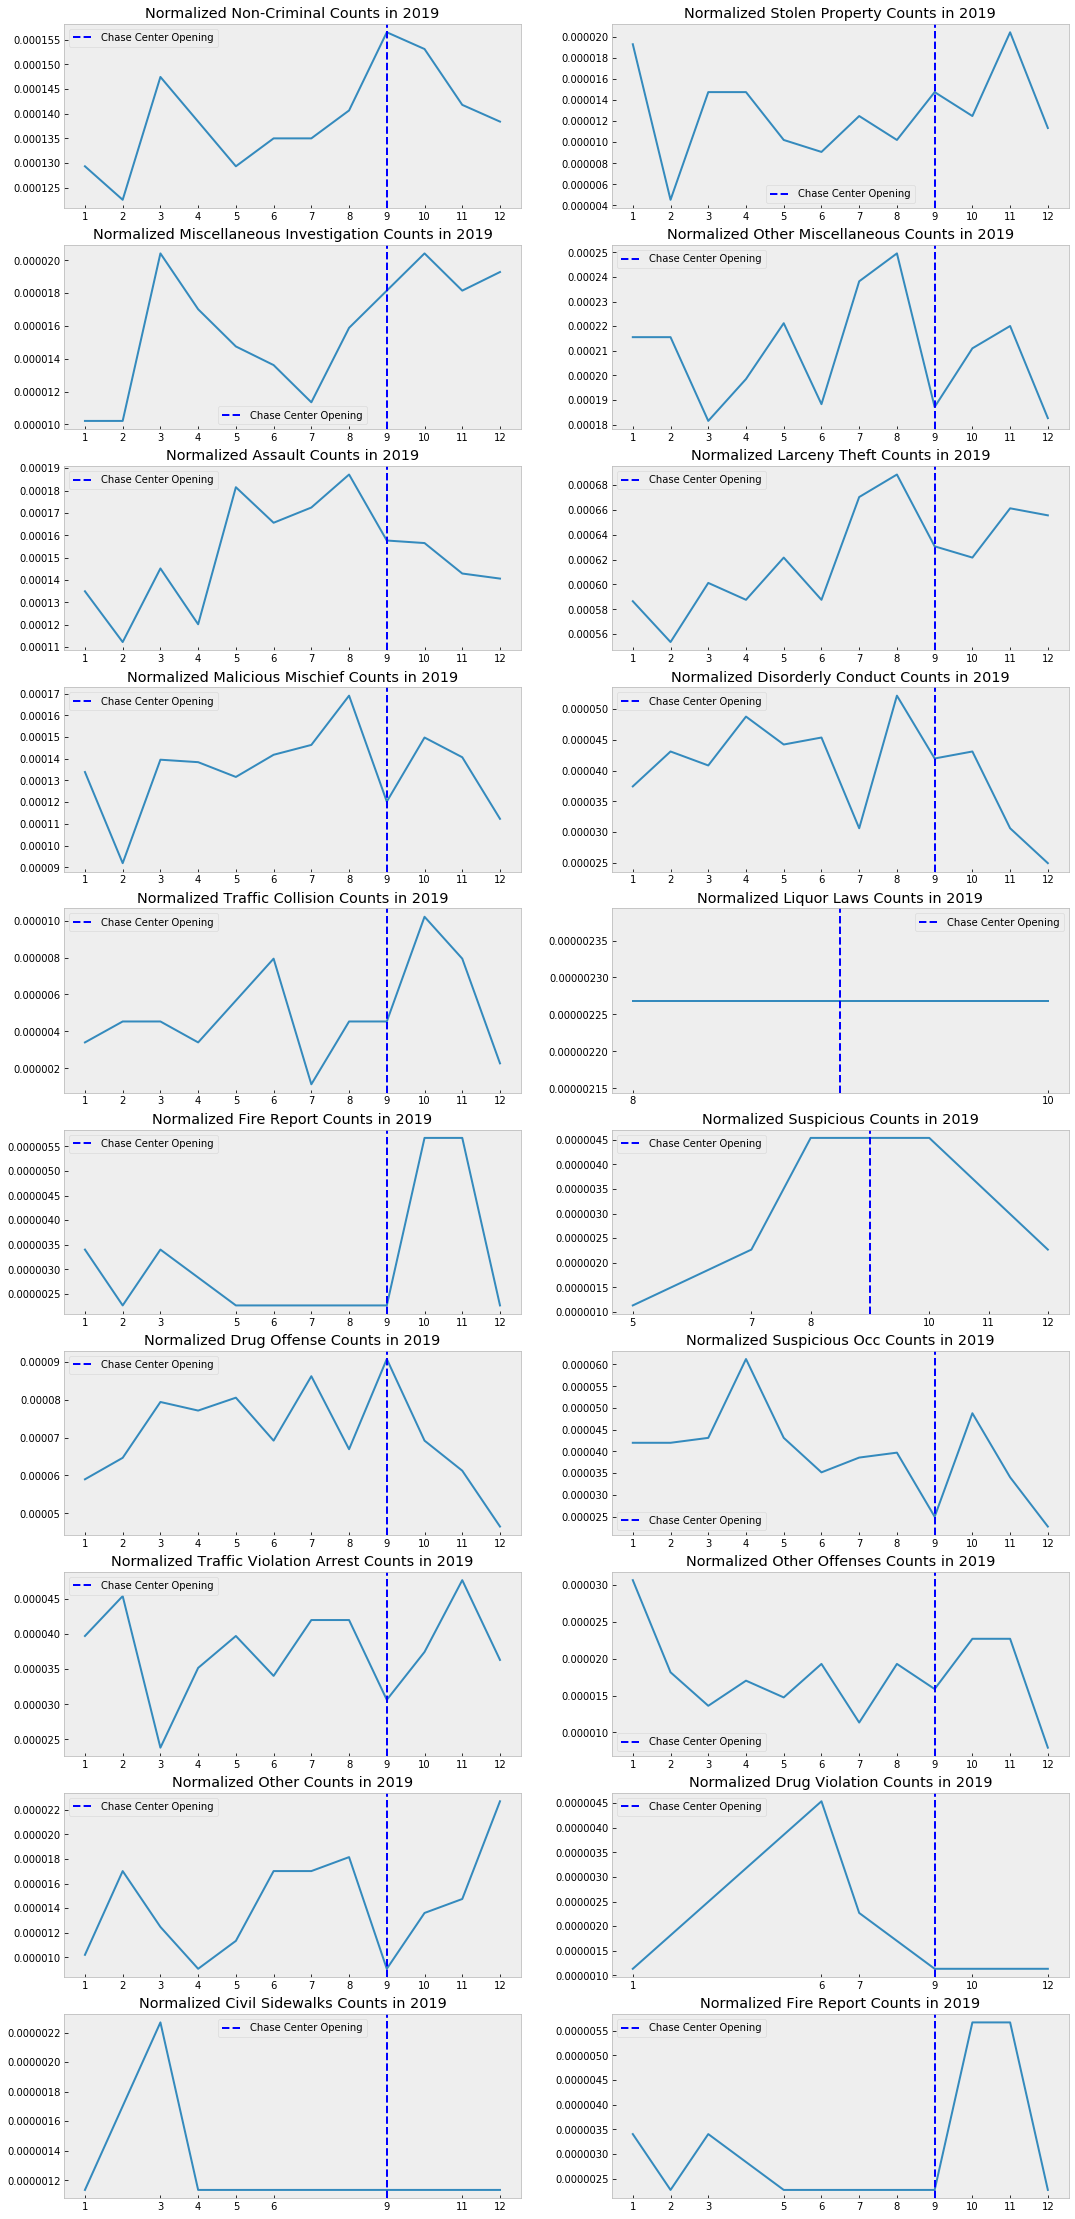

In [37]:
#Normalized Values
fig, axes = plt.subplots(10,2, figsize=(18,40))
for ix, ax in enumerate(axes.flatten()):
    graph = pol2019[pol2019['Incident Category']==cats_of_interest[ix]].sort_values('Incident Date')
    ax.plot(graph['Month'].unique(),graph.groupby('Month').sum()['Norm'])
    ax.axvline(9, ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'Normalized {cats_of_interest[ix]} Counts in 2019')
    ax.set_xticks(graph['Month'].unique())
    ax.legend(loc='best')
    ax.grid(None)
#     plt.savefig('Graphs/Normalized_Crime_DPMS.png')


/Users/sherryduong/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



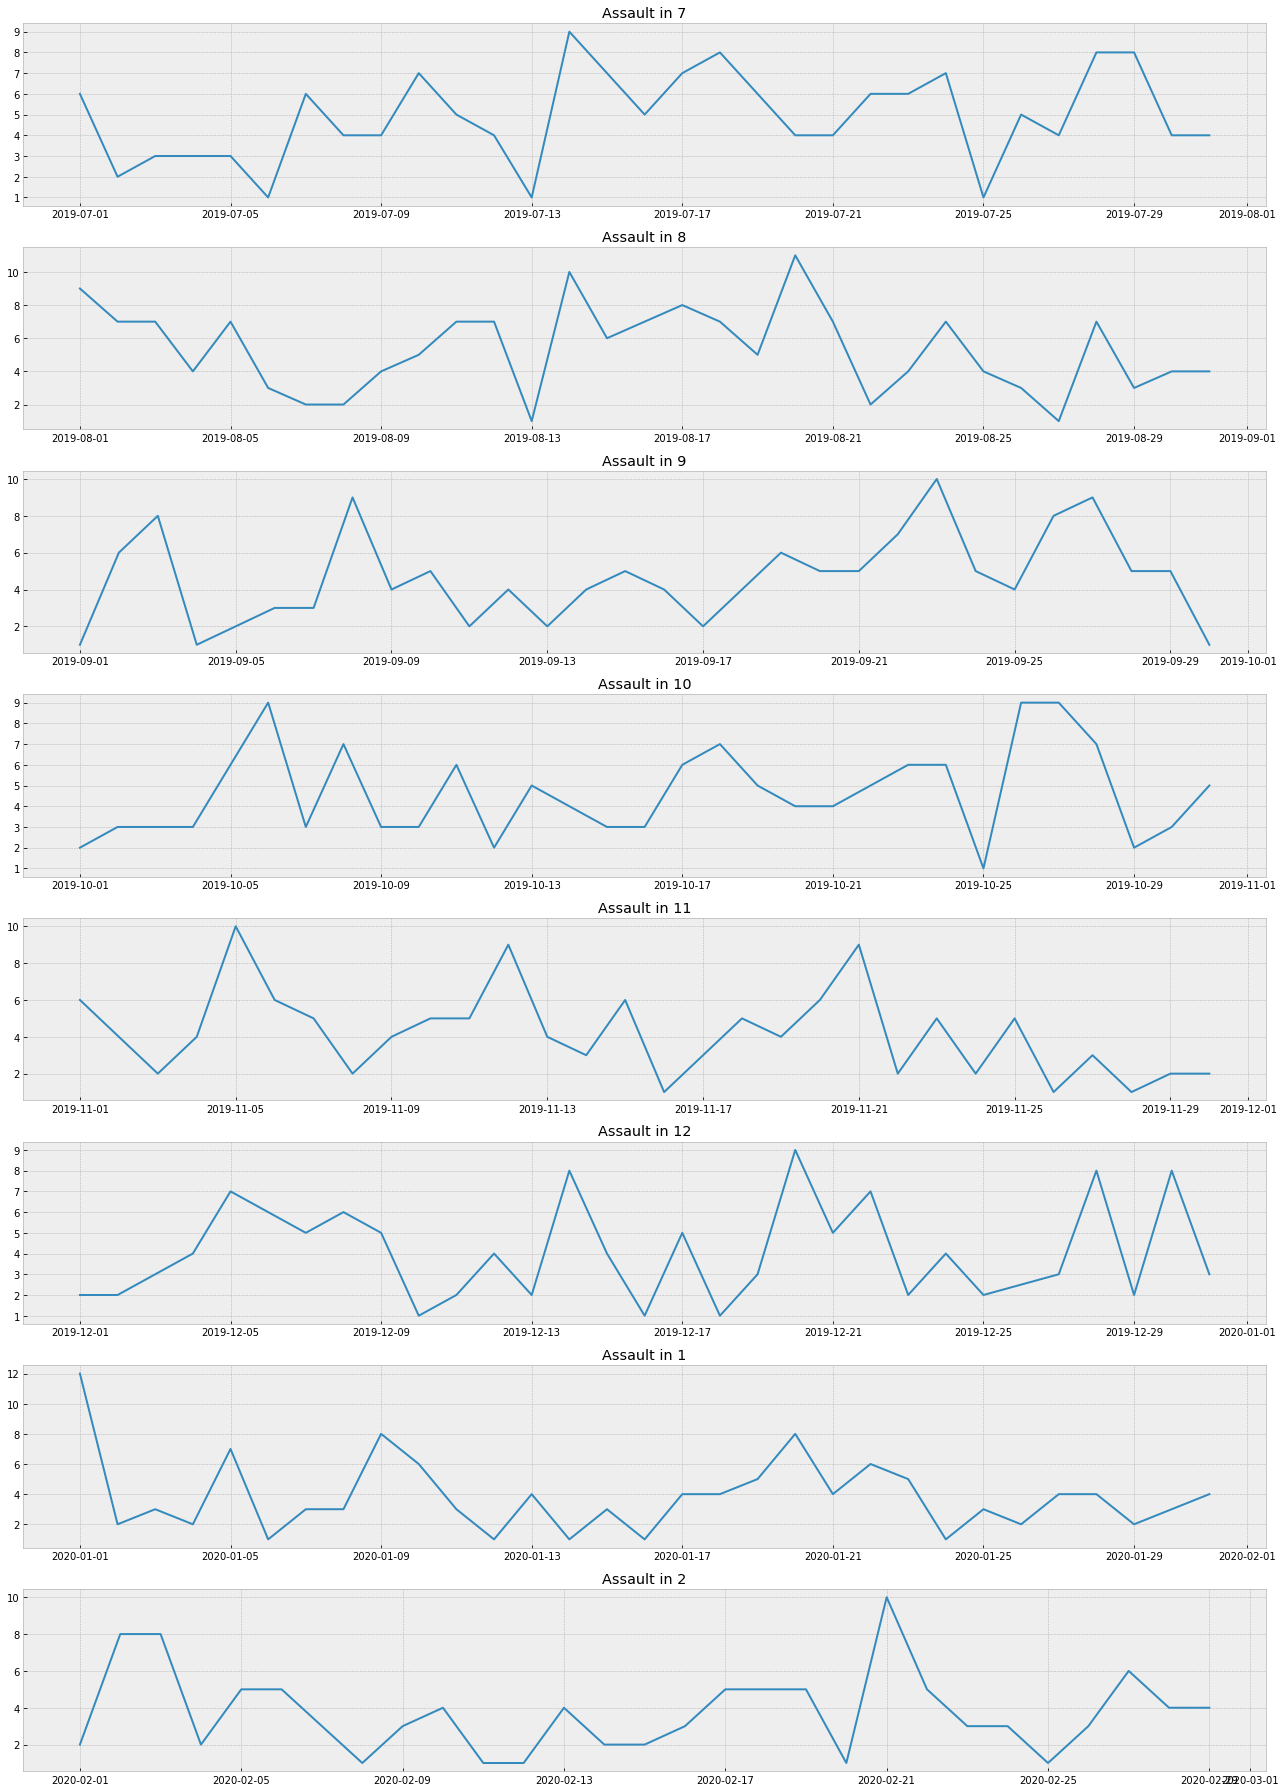

In [38]:
#Next step: Subplots per month for key indicators of interest: Medical Incidents, Alarms, Traffic Collisons
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
poljul19 = polpresentclean[polpresentclean['Incident Date'].isin(date_range)]
months = [7,8,9,10,11,12,1,2]
calls = ['Stolen Property','Miscellaneous Investigation','Other Miscellaneous','Assault', 'Larceny Theft', 
        'Disorderly Conduct','Traffic Collision','Fire Report', 'Suspicious', 'Drug Offense',
        'Suspicious Occ','Traffic Violation Arrest', 'Other Offenses', 'Other','Drug Violation']
event = calls[3]

fig, axes = plt.subplots(8,1, figsize=(18,25))
for ix, ax in enumerate(axes.flatten()):
    graph = poljul19[(poljul19['Month']==months[ix]) & (poljul19['Incident Category']==event)].sort_values('Incident Date')
    ax.plot(graph['Incident Date'].unique(),graph.groupby('Incident Date').count()['Norm'])
    ax.set_title(f'{event} in {months[ix]}')
fig.tight_layout()

In [39]:
polpresentclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37354 entries, 20 to 335093
Data columns (total 14 columns):
Incident Category         37354 non-null object
Incident Description      37354 non-null object
Incident Date             37354 non-null datetime64[ns]
Month                     37354 non-null int64
Month-Year                37354 non-null object
Year                      37354 non-null int64
Incident Time             37354 non-null object
Zipcode                   37354 non-null int64
Police District           37354 non-null object
Longitude_x               37354 non-null float64
Latitude_x                37354 non-null float64
Analysis Neighborhoods    37354 non-null float64
Incident Day of Week      37354 non-null object
Norm                      37354 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 4.3+ MB


## Takeaways
Per month, police are sopratic, averaging X per month. We will look specifically at Other Miscellaneous, Assault, Larceny Theft, Disorderly Conduct, Drug Offense, Suspicious Occ, Traffic Violation

**Hypothesis Testing:** 

Null Hypothesis: Average per capita rate of fire service calls on game days will be the same as non-game days

Alternative Hypothesis: Average per capita rate of fire service calls on game days will be higher than non-game days

In [40]:
#Import chase event dates
chase_events=pd.read_csv('Chase_Stadium_Events')
chase_events = chase_events.rename(columns = {'date':'Incident Date'})
chase_events['Incident Date'] = pd.to_datetime(chase_events['Incident Date'])
event_dates = chase_events['Incident Date'].unique()
chase_events = chase_events[['Incident Date','fields.type']]
chase_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
Incident Date    77 non-null datetime64[ns]
fields.type      77 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 1.3+ KB


In [41]:
#Only looking at categories in "Calls of interest"
date_range = pd.date_range(start='2019-09-01', end='2020-03-31')
pol2020 = polpresentclean[polpresentclean['Incident Date'].isin(date_range)]
events2020 = pol2020[pol2020['Incident Date'].isin(event_dates)]
eventdays = len(events2020['Incident Date'].unique())
notevents2020 = pol2020[~pol2020['Incident Date'].isin(event_dates)]
noteventdays = len(notevents2020['Incident Date'].unique())
events2020 = pd.merge(chase_events, events2020, on='Incident Date', how='left')
print(f'Number of Event Dates: {eventdays} Number of Non-Event Dates: {noteventdays}')
print(f'Incidents on Event Dates: {len(events2020)}, Incidents not on Event Dates: {len(notevents2020)}')

Number of Event Dates: 75 Number of Non-Event Dates: 138
Incidents on Event Dates: 3337, Incidents not on Event Dates: 5483


In [42]:
events_group = events2020.groupby(['Incident Date','fields.type']).count()['Norm']
mean_events = events2020['Norm'].count()/len(events2020['Incident Date'].unique())
mean_events

44.49333333333333

In [43]:
notevents_group = notevents2020.groupby('Incident Date').count()['Norm']
mean_not_events = notevents2020['Norm'].count()/len(notevents2020['Incident Date'].unique())
mean_not_events

39.731884057971016

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

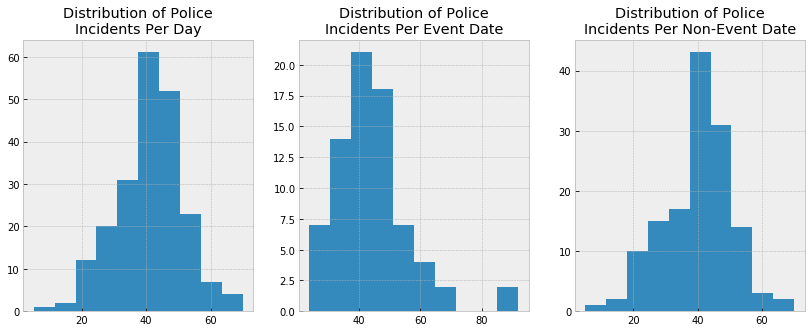

In [44]:
pol2020.head()
grouped = pol2020.groupby('Incident Date').count()['Norm']
fig, ax = plt.subplots(1,3, figsize=(14,5))
ax[0].hist(grouped,bins=10)
ax[0].set_title('Distribution of Police\nIncidents Per Day')
ax[1].hist(events_group,bins=10)
ax[1].set_title('Distribution of Police\nIncidents Per Event Date')
ax[2].hist(notevents_group,bins=10)
ax[2].set_title('Distribution of Police\nIncidents Per Non-Event Date')
plt.tight_layout
# plt.savefig('graphs/policeincidentdistribution.png', dpi=300)

In [45]:
stats.mannwhitneyu(events_group, notevents_group, alternative="greater")
#Based on the MannwhitneyTest Result, events at the Chase Center do have higher crime days

MannwhitneyuResult(statistic=6142.5, pvalue=0.012151800120502935)

[Text(0, 0, 'Events_group'), Text(0, 0, 'notevents_group')]

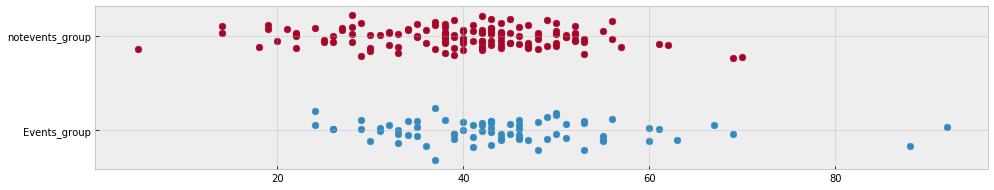

In [46]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(events_group, np.repeat(0, len(events_group)) + np.random.normal(0, 0.1, len(events_group)), s=45)
ax.scatter(notevents_group, np.repeat(1, len(notevents_group)) + np.random.normal(0, 0.1, len(notevents_group)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Events_group", "notevents_group"])
# plt.savefig('Graphs/EventsVsNonScatter_Police.png',dpi=300)

Text(0.5, 1.0, '')

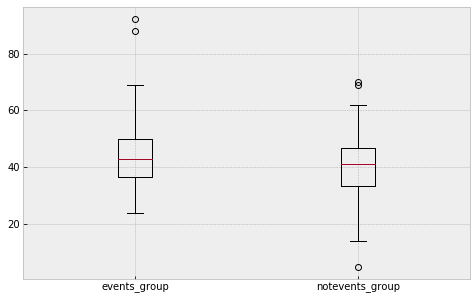

In [47]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([events_group, notevents_group])
ax.set_xticks([1,2])
ax.set_xticklabels(["events_group", "notevents_group"])
ax.set_title('')
# plt.savefig('Graphs/EventsVsNonBox_Police.png',dpi=300)

## Need to remove outliers in Events 

In [48]:
#Removing the outliers on 12/20 & 1/11
new_events2020 = events2020[~events2020['Incident Date'].isin(['2019-12-21', '2020-01-11'])]
new_events_group = new_events2020.groupby(['Incident Date']).count()['Norm']
mean_events_new = new_events2020['Norm'].count()/len(new_events2020['Incident Date'].unique())
sd_events_new = np.std(new_events2020.groupby('Incident Date').count()['Norm'])
print(f'Event Dates at Chase Stadium have on average {mean_events_new} Police Calls per day, {sd_events_new} SD')

Event Dates at Chase Stadium have on average 43.24657534246575 Police Calls per day, 9.847857456873493 SD


In [49]:
#Redo the mannwhitneyU without outliers
stats.mannwhitneyu(new_events_group, notevents_group, alternative="greater")

MannwhitneyuResult(statistic=5866.5, pvalue=0.02462675331219517)

In [50]:
T_test_Pval_two_tail = stats.ttest_ind(new_events_group, notevents_group, equal_var = False)
T_test_Pval = T_test_Pval_two_tail[1]/2
T_test_Pval

0.009496079039646601

In [51]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)
test_statistic = welch_test_statistic(new_events_group, notevents_group)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: 2.38


In [52]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df = welch_satterhwaithe_df(new_events_group, notevents_group)
df

159.02603833693405

Text(0.5, 1.0, "Welch's Distribution Given Events & Non Event Date Police Incidents are Equal")

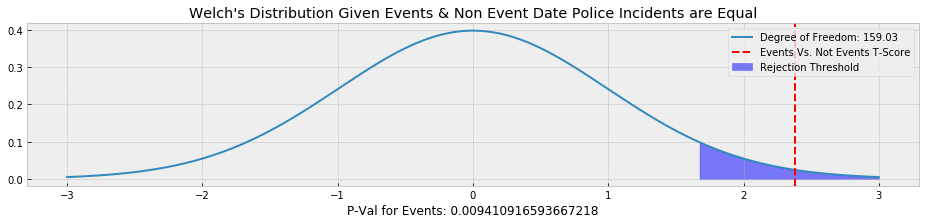

In [53]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
notevents_tdist = stats.t(df)
p_val = (1-notevents_tdist.cdf(test_statistic-.01))
critical_val = notevents_tdist.ppf(0.95)
ax.plot(x, notevents_tdist.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.fill_between(x, notevents_tdist.pdf(x), where=(x >= critical_val), color="blue", alpha=0.5, label='Rejection Threshold')
ax.axvline(test_statistic, color='red', ls='--', label='Events Vs. Not Events T-Score')
ax.set_xlabel(f'P-Val for Events: {p_val}')
ax.legend(loc='upper right')
ax.set_title("Welch's Distribution Given Events & Non Event Date Police Incidents are Equal")
# plt.savefig('Graphs/EventsVsNonHypotheisTest_Police.png')

## Events are typically on weekends > Is this driving up the mean?

In [54]:
new_events2020['Day of Week'] = new_events2020['Incident Date'].transform(lambda x: x.dayofweek)
notevents2020['Day of Week'] = notevents2020['Incident Date'].transform(lambda x: x.dayofweek)
new_events2020['Norm'] = 1/len(new_events2020)
notevents2020['Norm'] = 1/len(notevents2020)

In [55]:
new_events2020.groupby('Day of Week').sum()['Norm']

Day of Week
0    0.140006
1    0.107380
2    0.133671
3    0.155211
4    0.144124
5    0.232499
6    0.087108
Name: Norm, dtype: float64

In [56]:
notevents2020.groupby('Day of Week').sum()['Norm']

Day of Week
0    0.143899
1    0.150647
2    0.159767
3    0.124020
4    0.166515
5    0.083713
6    0.171439
Name: Norm, dtype: float64

## What About Accounting For Shelter In Place 3/19/2020+?

In [67]:
#Only looking at categories in "Calls of interest"
date_range = pd.date_range(start='2019-09-01', end='2020-03-19')
pol2020 = polpresentclean[polpresentclean['Incident Date'].isin(date_range)]
events2020 = pol2020[pol2020['Incident Date'].isin(event_dates)]
eventdays = len(events2020['Incident Date'].unique())
notevents2020 = pol2020[~pol2020['Incident Date'].isin(event_dates)]
noteventdays = len(notevents2020['Incident Date'].unique())
events2020 = pd.merge(chase_events, events2020, on='Incident Date', how='left')
print(f'Number of Event Dates: {eventdays} Number of Non-Event Dates: {noteventdays}')
print(f'Incidents on Event Dates: {len(events2020)}, Incidents not on Event Dates: {len(notevents2020)}')

Number of Event Dates: 75 Number of Non-Event Dates: 126
Incidents on Event Dates: 3337, Incidents not on Event Dates: 5214


In [68]:
events_group = events2020.groupby(['Incident Date','fields.type']).count()['Norm']
mean_events = events2020['Norm'].count()/len(events2020['Incident Date'].unique())
notevents_group = notevents2020.groupby('Incident Date').count()['Norm']
mean_not_events = notevents2020['Norm'].count()/len(notevents2020['Incident Date'].unique())
new_events2020 = events2020[~events2020['Incident Date'].isin(['2019-12-21', '2020-01-11'])]
new_events_group = new_events2020.groupby(['Incident Date']).count()['Norm']
mean_events_new = new_events2020['Norm'].count()/len(new_events2020['Incident Date'].unique())
sd_events_new = np.std(new_events2020.groupby('Incident Date').count()['Norm'])
print(f'Event Dates at Chase Stadium have on average {mean_events_new} Police Calls per day, {sd_events_new} SD')

Event Dates at Chase Stadium have on average 43.24657534246575 Police Calls per day, 9.847857456873493 SD


In [69]:
stats.mannwhitneyu(new_events_group, notevents_group, alternative="greater")

MannwhitneyuResult(statistic=5032.5, pvalue=0.13419981506263545)

In [70]:
T_test_Pval_two_tail = stats.ttest_ind(new_events_group, notevents_group, equal_var = False)
T_test_Pval = T_test_Pval_two_tail[1]/2
T_test_Pval

0.09816065198628032

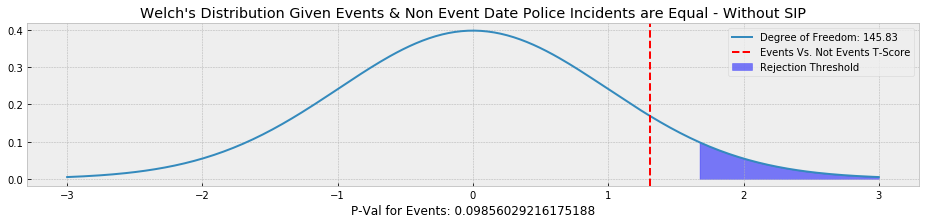

In [72]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)
test_statistic = welch_test_statistic(new_events_group, notevents_group)
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df
df = welch_satterhwaithe_df(new_events_group, notevents_group)
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
notevents_tdist = stats.t(df)
p_val = (1-notevents_tdist.cdf(test_statistic-.01))
critical_val = notevents_tdist.ppf(0.95)
ax.plot(x, notevents_tdist.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.fill_between(x, notevents_tdist.pdf(x), where=(x >= critical_val), color="blue", alpha=0.5, label='Rejection Threshold')
ax.axvline(test_statistic, color='red', ls='--', label='Events Vs. Not Events T-Score')
ax.set_xlabel(f'P-Val for Events: {p_val}')
ax.legend(loc='upper right')
ax.set_title("Welch's Distribution Given Events & Non Event Date Police Incidents are Equal - Without SIP")
plt.savefig('Graphs/EventsVsNonHypotheisTest_PoliceWOSIP.png')

## Shelter In Place has helped to bring the crime rate down for Non-Event Dates, making the difference between Event & Non-Event Dates seem bigger than it is.

## What about Basketball versus Concerts?

In [73]:
bball_dates = chase_events[chase_events['fields.type']=='gsw']['Incident Date'].unique()
concert_dates = chase_events[chase_events['fields.type']=='cce']['Incident Date'].unique()
bball_events = new_events2020[new_events2020['Incident Date'].isin(bball_dates)]
concert_events = new_events2020[new_events2020['Incident Date'].isin(concert_dates)]

In [74]:
bball_group = bball_events.groupby('Incident Date').count()['Norm']
concert_group = concert_events.groupby('Incident Date').count()['Norm']
bball_mean = np.mean(bball_group)
bball_sd = np.std(bball_group)
bball_se = bball_sd/(np.sqrt(len(bball_group)))
concert_mean = np.mean(concert_group)
concert_sd = np.std(concert_group)
concert_se = concert_sd/np.sqrt(len(concert_group))
print(f'Bball Mean: {bball_mean}, Concert Mean: {concert_mean}')
print(f'Bball sd: {bball_sd}, Concert sd: {concert_sd}')
print(f'Bball se: {bball_se}, Concert Mean: {concert_se}')

Bball Mean: 42.513513513513516, Concert Mean: 44.0
Bball sd: 11.303244264301556, Concert sd: 8.013876853447538
Bball se: 1.8582419103162642, Concert Mean: 1.3356461422412564


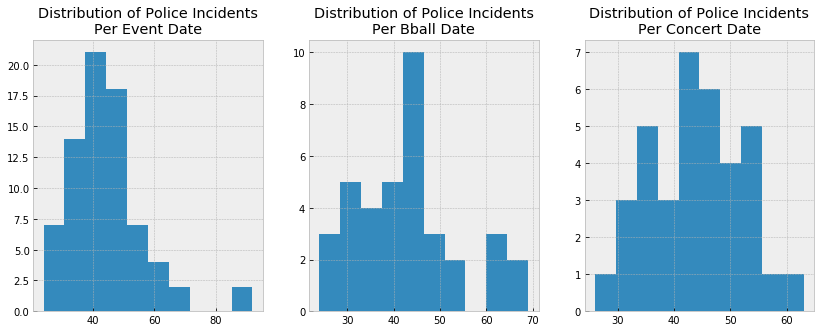

In [75]:
fig, ax = plt.subplots(1,3, figsize=(14,5))
ax[0].hist(events_group,bins=10)
ax[0].set_title('Distribution of Police Incidents\nPer Event Date')
ax[1].hist(bball_group,bins=10)
ax[1].set_title('Distribution of Police Incidents\nPer Bball Date')
ax[2].hist(concert_group,bins=10)
ax[2].set_title('Distribution of Police Incidents\nPer Concert Date')
plt.tight_layout
plt.savefig('graphs/policesbballconcertdist.png', dpi=300)

In [65]:
stats.mannwhitneyu(concert_group, bball_group, alternative="greater")

MannwhitneyuResult(statistic=753.5, pvalue=0.16832384083857832)

In [76]:
T_test_Pval_two_tail = stats.ttest_ind(concert_group, bball_group, equal_var = False)
T_test_Pval = T_test_Pval_two_tail[1]/2
print(f'The P-Val for Concert to Bball Events is: {T_test_Pval}')

The P-Val for Concert to Bball Events is: 0.2620054983727691
